In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import operator
import seaborn as sns

#  KNN Library
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

# Clean Null Data

In [2]:
#  Import Data
df = pd.read_csv("volusia_dataframe.csv")

In [3]:
#  Check null values
df.isnull()

,id,objectid,statefp,countyfp,tractce,blkgrpce,geoid,namelsad,mtfcc,funcstat,...,avg_sfla,avg_aprtot,avg_price,avg_rmbed,nbr_parcels,nbr_housing,pop,crime_rate,avg_hh_income,lstat
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
285,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
286,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
287,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
#  Check fetch only null value data
df.isnull().sum()

id               0
objectid         0
statefp          0
countyfp         0
tractce          0
blkgrpce         0
geoid            0
namelsad         0
mtfcc            0
funcstat         0
aland            0
awater           0
intptlat         0
intptlon         0
shape_leng       0
shape_area       0
geoid_data       0
geoid2           0
nbr_crimes       0
avg_sfla         0
avg_aprtot       0
avg_price        0
avg_rmbed        0
nbr_parcels      0
nbr_housing      0
pop              0
crime_rate       0
avg_hh_income    1
lstat            1
dtype: int64

In [5]:
#  Check non null values 
df.notnull()

,id,objectid,statefp,countyfp,tractce,blkgrpce,geoid,namelsad,mtfcc,funcstat,...,avg_sfla,avg_aprtot,avg_price,avg_rmbed,nbr_parcels,nbr_housing,pop,crime_rate,avg_hh_income,lstat
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
285,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
286,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
287,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [6]:
#  Classify into Low and High
df = df[df.nbr_crimes != 0] 
df.loc[df['nbr_crimes']<300, 'crime_rate'] = 'HIGH'
df.loc[df['nbr_crimes']<15, 'crime_rate'] = 'LOW'

In [7]:
df = df.dropna()

In [8]:
df = df.iloc[:,19:28]

In [9]:
#  Data Frame 
df

,avg_sfla,avg_aprtot,avg_price,avg_rmbed,nbr_parcels,nbr_housing,pop,crime_rate,avg_hh_income
1,1114.6,58531.3,66471,2.8,21,131,263,HIGH,21563.0
2,1158.8,99391.1,118591,2.1,35,12,165,HIGH,25083.0
5,1267.2,142387.2,155418,2.7,49,134,298,LOW,35694.0
9,1305.9,138037.8,152733,2.9,165,518,1232,LOW,31019.0
10,1202.9,237435.5,265685,2.2,259,483,745,LOW,43324.0
...,...,...,...,...,...,...,...,...,...
284,1556.9,466339.8,523239,2.6,149,347,431,HIGH,67969.0
285,1421.9,203062.9,236990,2.5,201,802,1092,HIGH,35329.0
286,1200.2,137053.9,154601,2.7,83,143,292,HIGH,49667.0
287,1773.4,203532.7,236808,2.9,153,164,341,HIGH,44815.0


# Normalize Data

In [10]:
#  Select columns
df.columns

Index(['avg_sfla', 'avg_aprtot', 'avg_price', 'avg_rmbed', 'nbr_parcels',
       'nbr_housing', 'pop', 'crime_rate', 'avg_hh_income'],
      dtype='object')

In [11]:
X_Data = df[['avg_sfla', 'avg_aprtot', 'avg_price', 'avg_rmbed', 'nbr_parcels',
       'nbr_housing', 'pop', 'avg_hh_income']]

Y_Data = df[["crime_rate"]]

In [12]:
#  Lambda Method
X_Data = X_Data.apply(lambda X: (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0)))

In [13]:
X_Data

,avg_sfla,avg_aprtot,avg_price,avg_rmbed,nbr_parcels,nbr_housing,pop,avg_hh_income
1,0.213961,0.013577,0.007308,0.757576,0.010289,0.096182,0.087144,0.138347
2,0.236564,0.090761,0.094336,0.545455,0.017148,0.008811,0.054672,0.179987
5,0.291997,0.171980,0.155827,0.727273,0.024008,0.098385,0.098741,0.305510
9,0.311787,0.163764,0.151344,0.787879,0.080843,0.380323,0.408217,0.250207
10,0.259115,0.351526,0.339945,0.575758,0.126899,0.354626,0.246852,0.395770
...,...,...,...,...,...,...,...,...
284,0.440143,0.783924,0.769994,0.696970,0.073003,0.254772,0.142810,0.687309
285,0.371107,0.286596,0.292032,0.666667,0.098481,0.588840,0.361829,0.301192
286,0.257735,0.161906,0.154463,0.727273,0.040666,0.104993,0.096753,0.470805
287,0.550857,0.287483,0.291728,0.787879,0.074963,0.120411,0.112989,0.413408


In [14]:
Y_Data

,crime_rate
1,HIGH
2,HIGH
5,LOW
9,LOW
10,LOW
...,...
284,HIGH
285,HIGH
286,HIGH
287,HIGH


# K-Nearest Neighbors


In [15]:
#  Split Dataset
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data, test_size=0.2, random_state=2)

In [16]:
#  Scale Data
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [17]:
#  Calculate k
import math
math.sqrt(len(Y_Train))

12.649110640673518

In [18]:
#  Define Model
classifier = KNeighborsClassifier(n_neighbors=13, p=2 ,metric='euclidean')

In [19]:
#  Fit Model
classifier.fit(X_Train, Y_Train)
print(classifier)

KNeighborsClassifier(metric='euclidean', n_neighbors=13)


<ipython-input-19-93ebaf2f6e50>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  classifier.fit(X_Train, Y_Train)


In [20]:
#  Predict test results
Y_Predict = classifier.predict(X_Test)
Y_Predict

array(['HIGH', 'HIGH', 'HIGH', 'HIGH', 'LOW', 'LOW', 'HIGH', 'LOW',
       'HIGH', 'HIGH', 'LOW', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'HIGH',
       'HIGH', 'HIGH', 'HIGH', 'HIGH', 'LOW', 'LOW', 'HIGH', 'HIGH',
       'LOW', 'HIGH', 'LOW', 'HIGH', 'HIGH', 'LOW', 'LOW', 'HIGH', 'LOW',
       'LOW', 'HIGH', 'HIGH', 'HIGH', 'HIGH', 'LOW', 'HIGH', 'HIGH'],
      dtype=object)

# Confusion Matrix

In [21]:
#  Evaluate Model
cm = confusion_matrix(Y_Test, Y_Predict)
print (cm)

[[24  3]
 [ 4 10]]


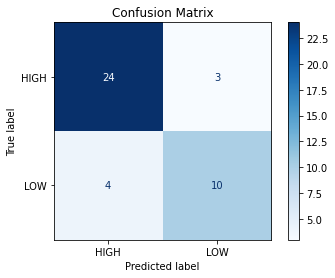

In [22]:
# Plot confusion matrix
plot_confusion_matrix(classifier, X_Test, Y_Test, cmap=plt.cm.Blues)  
plt.title('Confusion Matrix')
plt.show()

In [23]:
print(metrics.classification_report(Y_Test, Y_Predict))

              precision    recall  f1-score   support

        HIGH       0.86      0.89      0.87        27
         LOW       0.77      0.71      0.74        14

    accuracy                           0.83        41
   macro avg       0.81      0.80      0.81        41
weighted avg       0.83      0.83      0.83        41



# ROC Curves

In [25]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, auc 
import matplotlib.pyplot as plt

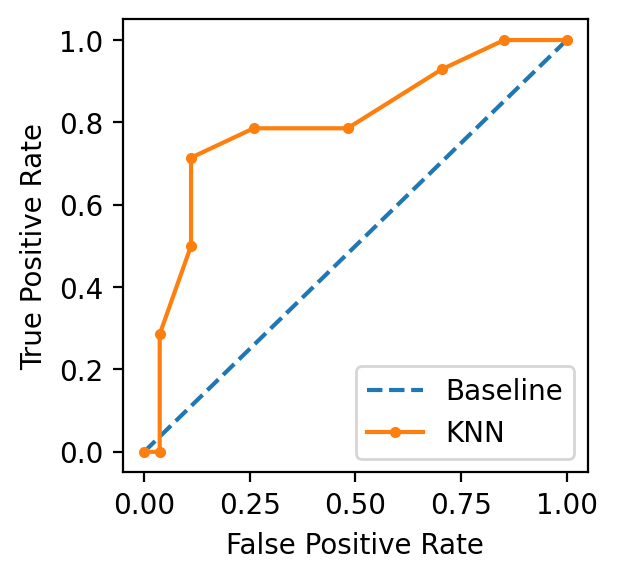

ROC AUC:   0.7962962962962963


In [29]:
# Actual class predictions
knn_predictions = classifier.predict( X_Test)
# Probabilities for each class
knn_probs = classifier.predict_proba(X_Test)[:, 1]

# generate a baseline prediction (majority class)
b_probs = [0 for _ in range(len(Y_Test))]
# calculate roc curves
b_fpr, b_tpr, _ = roc_curve(Y_Test, b_probs, pos_label = 'LOW')
fpr, tpr, thresh = roc_curve(Y_Test, knn_probs, pos_label = 'LOW')
# plot the roc curve for the model
plt.figure(figsize=(3,3), dpi = 200)
plt.plot(b_fpr, b_tpr, linestyle='--', label='Baseline')
plt.plot(fpr, tpr, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

print('ROC AUC:  ', roc_auc_score(Y_Test, knn_probs, average = 'macro'))